<a href="https://colab.research.google.com/github/a-m-andrushko/Argon_simulation/blob/main/Argon_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

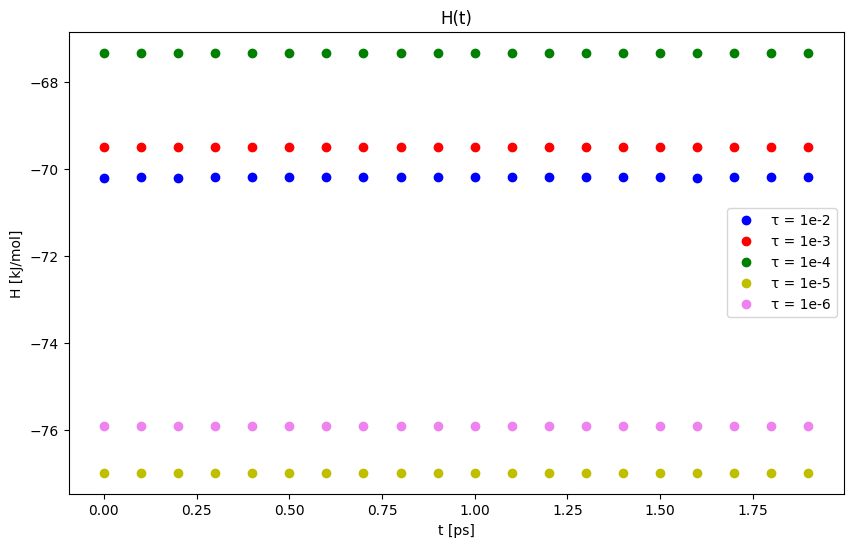

In [2]:
# 5.1

# LOAD DATA
data_2 = np.loadtxt('state_1e-2.txt')
data_3 = np.loadtxt('state_1e-3.txt')
data_4 = np.loadtxt('state_1e-4.txt')
data_5 = np.loadtxt('state_1e-5.txt')
data_6 = np.loadtxt('state_1e-6.txt')

# EXTRACT TIME AND HAMILTONIAN
t_2 = data_2[:, 0] / 100
H_2 = data_2[:, 1]

t_3 = data_3[:, 0] / 1000
H_3 = data_3[:, 1]

t_4 = data_4[:, 0] / 10000
H_4 = data_4[:, 1]

t_5 = data_5[:, 0] / 100000
H_5 = data_5[:, 1]

t_6 = data_6[:, 0] / 1000000
H_6 = data_6[:, 1]

# PLOT
plt.figure(figsize=(10, 6))
plt.plot(t_2, H_2, marker = 'o', linestyle = '', color = 'b', label = 'τ = 1e-2')
plt.plot(t_3, H_3, marker = 'o', linestyle = '', color = 'r', label = 'τ = 1e-3')
plt.plot(t_4, H_4, marker = 'o', linestyle = '', color = 'g', label = 'τ = 1e-4')
plt.plot(t_5, H_5, marker = 'o', linestyle = '', color = 'y', label = 'τ = 1e-5')
plt.plot(t_6, H_6, marker = 'o', linestyle = '', color = 'violet', label = 'τ = 1e-6')
plt.title('H(t)')
plt.xlabel('t [ps]')
plt.ylabel('H [kJ/mol]')
plt.legend()
plt.show()

In [3]:
# 5.2

# LOAD DATA, FIND MINIMUM VALUE FOR POTENTIAL ENERGY FOR THE RANGE a Є [0.368; 0.380] nm
data = np.loadtxt('a_368.txt')

min_value = np.min(data[:, 2])

print("Minimum E_pot value: ", min_value)

Minimum E_pot value:  -675.70255


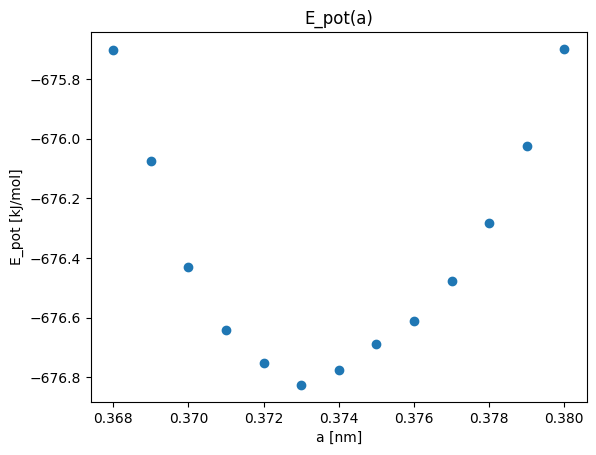

In [4]:
# CREATE ARRAYS FOR E_pot AND a
E_pot = np.array([-675.70255, -676.07535, -676.42899, -676.63968, -676.75277, -676.82533, -676.77395, -676.68864, -676.61129, -676.47705, -676.28283, -676.02491, -675.69906])
a = np.array([0.368, 0.369, 0.370, 0.371, 0.372, 0.373, 0.374, 0.375, 0.376, 0.377, 0.378, 0.379, 0.380])

# PLOT
plt.plot(a, E_pot, marker = 'o', linestyle = '')
plt.xlabel('a [nm]')
plt.ylabel('E_pot [kJ/mol]')
plt.title('E_pot(a)')
plt.show()

618.5736893999999


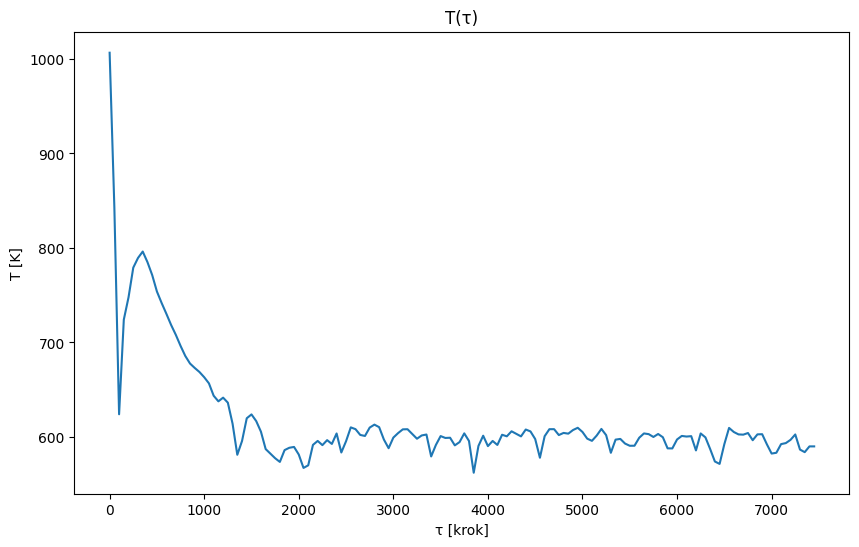

In [5]:
# 5.4

# LOAD DATA
data = np.loadtxt('T_1000K_termalizacja.txt')

# FIND AVERAGE TEMPERATURE
avg_value = np.mean(data[:, 3])
print(avg_value)

# EXTRACT TIMESTEP AND TEMPERATURE
tau = data[:, 0]
T = data[:, 3]

# PLOT
plt.figure(figsize = (10, 6))
plt.plot(tau, T, linestyle = '-')
plt.xlabel('τ [krok]')
plt.ylabel('T [K]')
plt.title('T(τ)')
plt.show()

231.82096544000004


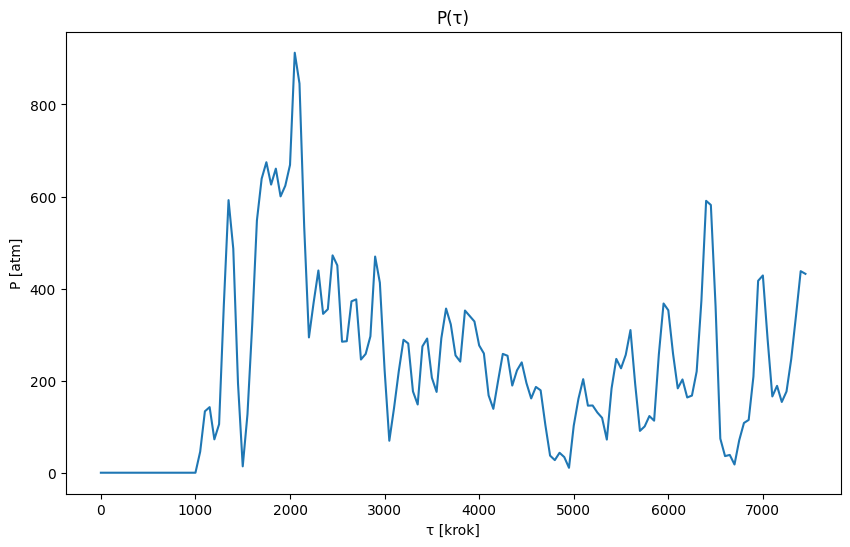

In [6]:
# LOAD DATA
data = np.loadtxt('T_1000K_termalizacja.txt')

# FIND AVERAGE PRESSURE AND CONVERT IT TO atm
avg_value = np.mean(data[:, 4]) * 16.6
print(avg_value)

# EXTRACT TIMESTEP AND PRESSURE
tau = data[:, 0]
P = data[:, 4] * 16.6

# PLOT
plt.figure(figsize = (10, 6))
plt.plot(tau, P, linestyle = '-')
plt.xlabel('τ [krok]')
plt.ylabel('P [atm]')
plt.title('P(τ)')
plt.show()

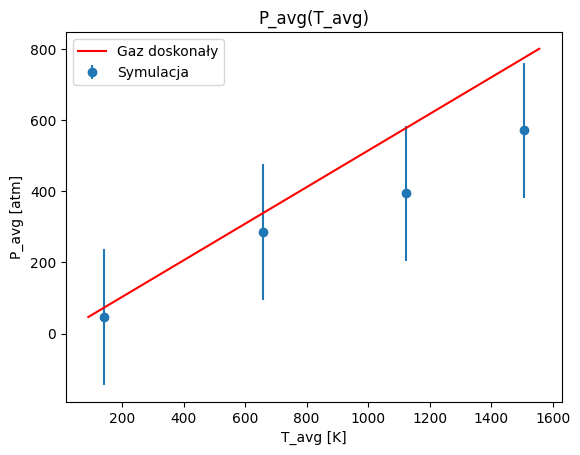

In [7]:
# CREATE ARRAYS FOR AVERAGE TEMPERATURES AND PRESSURES IN atm
T_avg = np.array([140.54, 658.25, 1124.22, 1506.69])
P_avg = np.array([2.78, 17.20, 23.76, 34.42]) * 16.6

# CALCULATE STANDARD DEVIATION FOR P
std_dev_P = np.std(P_avg)

# DEFINE THEORETICAL FORMULA FOR IDEAL GAS
def ideal_gas(T):
    return 0.031 * 16.6 * T

# GENERATE A RANGE FOR T AND CALCULATE THEORETICAL P
T_range = np.linspace(min(T_avg) - 50, max(T_avg) + 50, 500)
P_theoretical = ideal_gas(T_range)

# PLOT
plt.errorbar(T_avg, P_avg, yerr = std_dev_P, marker = 'o', linestyle = '', label = 'Symulacja')
plt.plot(T_range, P_theoretical, '-', label = 'Gaz doskonały', color = 'red')
plt.xlabel('T_avg [K]')
plt.ylabel('P_avg [atm]')
plt.title('P_avg(T_avg)')
plt.legend()
plt.show()